<a href="https://colab.research.google.com/github/RDifault/Machine-and-Deep-Learning-Projects/blob/main/ANFIS_for_Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# !pip install scikit-fuzzy

## Read Dataset

In [ ]:
df = pd.read_csv('Admission_Predict.csv')

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
print(df.shape)

(500, 9)


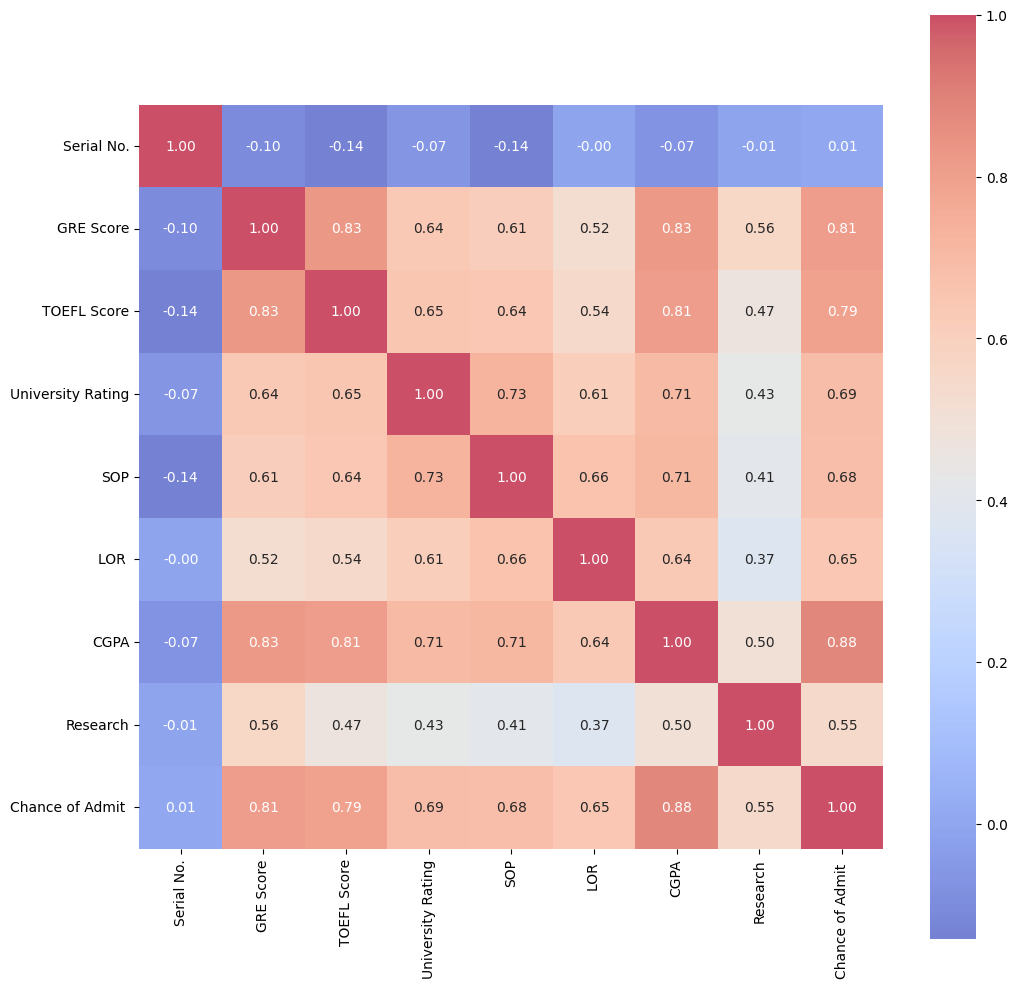

In [ ]:
plt.figure(figsize=(12,12))
sn.heatmap(df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',
           alpha = 0.7,   cmap= 'coolwarm')
plt.show()

Fitur yang dipilih:

1.   X1 = CGPA
2.   X2 = GRE Score
3.   Y = Chance of Admit



In [ ]:
# x_data = df.drop(['Serial No.', 'Research', 'TOEFL Score', 'LOR ', 'SOP', 'University Rating', 'Chance of Admit '], axis=1)
x1 = df['CGPA']
x2 = df['GRE Score']
x2

0      337
1      324
2      316
3      322
4      314
      ... 
495    332
496    337
497    330
498    312
499    327
Name: GRE Score, Length: 500, dtype: int64

In [ ]:
y_data = df['Chance of Admit ']
y_data

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

##K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

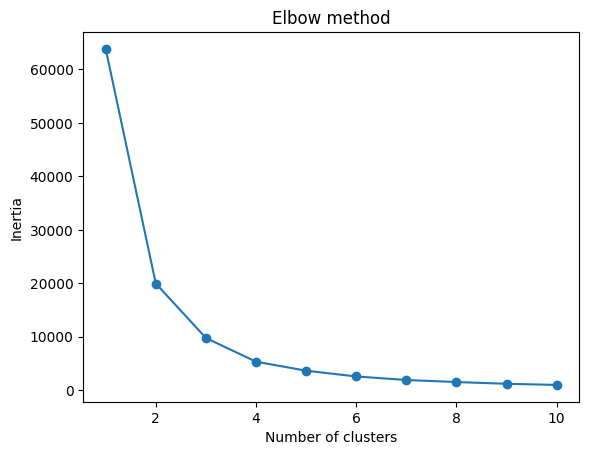

In [ ]:
data = list(zip(x1, x2))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


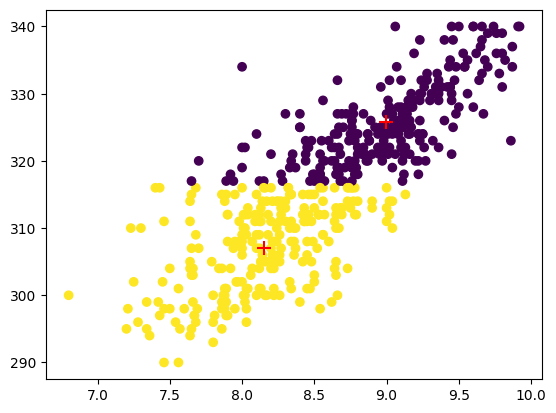

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit_predict(data)

plt.scatter(x1, x2, c=kmeans.labels_)

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, alpha=1 , marker='+')

plt.show()

In [ ]:
kmeans.cluster_centers_

array([[  8.99488095, 325.75793651],
       [  8.15125   , 307.03629032]])

In [ ]:
kmeans.labels_

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,

## Standard Deviation dan Mean

In [ ]:
x1 = pd.concat([x1, pd.DataFrame(kmeans.labels_)], axis=1)
x1 = x1.rename(columns={ x1.columns[1]: "Cluster" })
x1

,CGPA,Cluster
0,9.65,0
1,8.87,0
2,8.00,1
3,8.67,0
4,8.21,1
...,...,...
495,9.02,0
496,9.87,0
497,9.56,0
498,8.43,1


In [ ]:
x2 = pd.concat([x2, pd.DataFrame(kmeans.labels_)], axis=1)
x2 = x2.rename(columns={ x2.columns[1]: "Cluster" })
x2

,GRE Score,Cluster
0,337,0
1,324,0
2,316,1
3,322,0
4,314,1
...,...,...
495,332,0
496,337,0
497,330,0
498,312,1


### Standar Deviasi dan Mean X1

In [ ]:
from scipy.stats import gstd
from scipy.stats.mstats import gmean

X1A = x1[x1['Cluster'] == 0]
stdevX1A = np.exp(np.std(np.log(X1A.iloc[:,0])))

X1B = x1[x1['Cluster'] == 1]
stdevX1B = np.exp(np.std(np.log(X1B.iloc[:,0])))

meanX1A= gmean(X1A.iloc[:,0])

meanX1B= gmean(X1B.iloc[:,0])

print('Standar Deviasi X1 Cluster 0:', stdevX1A)
print('Standar Deviasi X1 Cluster 1:', stdevX1B)
print('Mean X1 Cluster 0:', meanX1A)
print('Mean X1 Cluster 1:', meanX1B)

Standar Deviasi X1 Cluster 0: 1.0514083965385825
Standar Deviasi X1 Cluster 1: 1.053089902489899
Mean X1 Cluster 0: 8.983667611432043
Mean X1 Cluster 1: 8.140414634324813


### Standar Deviasi dan Mean X2

In [ ]:
X2A = x2[x2['Cluster'] == 0]
stdevX2A = np.exp(np.std(np.log(X2A.iloc[:,0])))

X2B = x2[x2['Cluster'] == 1]
stdevX2B = np.exp(np.std(np.log(X2B.iloc[:,0])))

meanX2A= gmean(X2A.iloc[:,0])

meanX2B= gmean(X2B.iloc[:,0])

print('Standar Deviasi X2 Cluster 0:', stdevX2A)
print('Standar Deviasi X2 Cluster 1:', stdevX2B)
print('Mean X2 Cluster 0:', meanX2A)
print('Mean X2 Cluster 1:', meanX2B)

Standar Deviasi X2 Cluster 0: 1.0188780528502681
Standar Deviasi X2 Cluster 1: 1.021410797472706
Mean X2 Cluster 0: 325.70076129149334
Mean X2 Cluster 1: 306.96761597500256


# ANFIS Model

Source: https://github.com/twmeggs/anfis/blob/master/anfis/membership/mfDerivs.py

## Membership Function

In [ ]:
from skfuzzy import gaussmf, gbellmf, sigmf

class MemFuncs:
    'Common base class for all employees'
    funcDict = {'gaussmf': gaussmf, 'gbellmf': gbellmf, 'sigmf': sigmf}


    def __init__(self, MFList):
        self.MFList = MFList

    def evaluateMF(self, rowInput):
        if len(rowInput) != len(self.MFList):
            print("Number of variables does not match number of rule sets")

        return [[self.funcDict[self.MFList[i][k][0]](rowInput[i],**self.MFList[i][k][1]) for k in range(len(self.MFList[i]))] for i in range(len(rowInput))]

In [ ]:
def partial_dMF(x, mf_definition, partial_parameter):
    mf_name = mf_definition[0]

    if mf_name == 'gaussmf':

        sigma = mf_definition[1]['sigma']
        mean = mf_definition[1]['mean']

        if partial_parameter == 'sigma':
            result = (2./sigma**3) * np.exp(-(((x-mean)**2)/(sigma)**2))*(x-mean)**2
        elif partial_parameter == 'mean':
            result = (2./sigma**2) * np.exp(-(((x-mean)**2)/(sigma)**2))*(x-mean)

    elif mf_name == 'gbellmf':

        a = mf_definition[1]['a']
        b = mf_definition[1]['b']
        c = mf_definition[1]['c']

        if partial_parameter == 'a':
            result = (2. * b * np.power((c-x),2) * np.power(np.absolute((c-x)/a), ((2 * b) - 2))) / \
                (np.power(a, 3) * np.power((np.power(np.absolute((c-x)/a),(2*b)) + 1), 2))
        elif partial_parameter == 'b':
            result = -1 * (2 * np.power(np.absolute((c-x)/a), (2 * b)) * np.log(np.absolute((c-x)/a))) / \
                (np.power((np.power(np.absolute((c-x)/a), (2 * b)) + 1), 2))
        elif partial_parameter == 'c':
            result = (2. * b * (c-x) * np.power(np.absolute((c-x)/a), ((2 * b) - 2))) / \
                (np.power(a, 2) * np.power((np.power(np.absolute((c-x)/a),(2*b)) + 1), 2))

    elif mf_name == 'sigmf':

        b = mf_definition[1]['b']
        c = mf_definition[1]['c']

        if partial_parameter == 'b':
            result = -1 * (c * np.exp(c * (b + x))) / \
                np.power((np.exp(b*c) + np.exp(c*x)), 2)
        elif partial_parameter == 'c':
            result = ((x - b) * np.exp(c * (x - b))) / \
                np.power((np.exp(c * (x - c))) + 1, 2)


    return result

## ANFIS

In [ ]:
import itertools
import copy

class ANFIS:
    """Class to implement an Adaptive Network Fuzzy Inference System: ANFIS"
    Attributes:
        X
        Y
        XLen
        memClass
        memFuncs
        memFuncsByVariable
        rules
        consequents
        errors
        memFuncsHomo
        trainingType
    """

    def __init__(self, X, Y, memFunction):
        self.X = np.array(copy.copy(X))
        self.Y = np.array(copy.copy(Y))
        self.XLen = len(self.X)
        self.memClass = copy.deepcopy(memFunction)
        self.memFuncs = self.memClass.MFList
        self.memFuncsByVariable = [[x for x in range(len(self.memFuncs[z]))] for z in range(len(self.memFuncs))]
        self.rules = np.array(list(itertools.product(*self.memFuncsByVariable)))
        self.consequents = np.empty(self.Y.ndim * len(self.rules) * (self.X.shape[1] + 1))
        self.consequents.fill(0)
        self.errors = np.empty(0)
        self.memFuncsHomo = all(len(i)==len(self.memFuncsByVariable[0]) for i in self.memFuncsByVariable)
        self.trainingType = 'Not trained yet'

    def LSE(self, A, B, initialGamma = 1000.):
        coeffMat = A
        rhsMat = B
        S = np.eye(coeffMat.shape[1])*initialGamma
        x = np.zeros((coeffMat.shape[1],1)) # need to correct for multi-dim B
        for i in range(len(coeffMat[:,0])):
            a = coeffMat[i,:]
            b = np.array(rhsMat[i])
            S = S - (np.array(np.dot(np.dot(np.dot(S,np.matrix(a).transpose()),np.matrix(a)),S)))/(1+(np.dot(np.dot(S,a),a)))
            x = x + (np.dot(S,np.dot(np.matrix(a).transpose(),(np.matrix(b)-np.dot(np.matrix(a),x)))))
        return x

    def trainHybridJangOffLine(self, epochs=5, tolerance=1e-5, initialGamma=1000, k=0.01):

        self.trainingType = 'trainHybridJangOffLine'
        convergence = False
        epoch = 1

        while (epoch < epochs) and (convergence is not True):

            #layer four: forward pass
            [layerFour, wSum, w] = forwardHalfPass(self, self.X)

            #layer five: least squares estimate
            layerFive = np.array(self.LSE(layerFour,self.Y,initialGamma))
            self.consequents = layerFive
            layerFive = np.dot(layerFour,layerFive)

            #error
            error = np.sum((self.Y-layerFive.T)**2)
            print('current error: '+ str(error))
            average_error = np.average(np.absolute(self.Y-layerFive.T))
            self.errors = np.append(self.errors,error)

            if len(self.errors) != 0:
                if self.errors[len(self.errors)-1] < tolerance:
                    convergence = True

            # back propagation
            if convergence is not True:
                cols = range(len(self.X[0,:]))
                dE_dAlpha = list(backprop(self, colX, cols, wSum, w, layerFive) for colX in range(self.X.shape[1]))


            if len(self.errors) >= 4:
                if (self.errors[-4] > self.errors[-3] > self.errors[-2] > self.errors[-1]):
                    k = k * 1.1

            if len(self.errors) >= 5:
                if (self.errors[-1] < self.errors[-2]) and (self.errors[-3] < self.errors[-2]) and (self.errors[-3] < self.errors[-4]) and (self.errors[-5] > self.errors[-4]):
                    k = k * 0.9

            ## handling of variables with a different number of MFs
            t = []
            for x in range(len(dE_dAlpha)):
                for y in range(len(dE_dAlpha[x])):
                    for z in range(len(dE_dAlpha[x][y])):
                        t.append(dE_dAlpha[x][y][z])

            eta = k / np.abs(np.sum(t))

            if(np.isinf(eta)):
                eta = k

            ## handling of variables with a different number of MFs
            dAlpha = copy.deepcopy(dE_dAlpha)
            if not(self.memFuncsHomo):
                for x in range(len(dE_dAlpha)):
                    for y in range(len(dE_dAlpha[x])):
                        for z in range(len(dE_dAlpha[x][y])):
                            dAlpha[x][y][z] = -eta * dE_dAlpha[x][y][z]
            else:
                dAlpha = -eta * np.array(dE_dAlpha)


            for varsWithMemFuncs in range(len(self.memFuncs)):
                for MFs in range(len(self.memFuncsByVariable[varsWithMemFuncs])):
                    paramList = sorted(self.memFuncs[varsWithMemFuncs][MFs][1])
                    for param in range(len(paramList)):
                        self.memFuncs[varsWithMemFuncs][MFs][1][paramList[param]] = self.memFuncs[varsWithMemFuncs][MFs][1][paramList[param]] + dAlpha[varsWithMemFuncs][MFs][param]
            epoch = epoch + 1


        self.fittedValues = predict(self,self.X)
        self.residuals = self.Y - self.fittedValues[:,0]

        return self.fittedValues


    def plotErrors(self):
        if self.trainingType == 'Not trained yet':
            print(self.trainingType)
        else:
            import matplotlib.pyplot as plt
            plt.plot(range(len(self.errors)),self.errors,'ro', label='errors')
            plt.ylabel('error')
            plt.xlabel('epoch')
            plt.show()

    def plotMF(self, x, inputVar):
        import matplotlib.pyplot as plt
        from skfuzzy import gaussmf, gbellmf, sigmf

        for mf in range(len(self.memFuncs[inputVar])):
            if self.memFuncs[inputVar][mf][0] == 'gaussmf':
                y = gaussmf(x,**self.memClass.MFList[inputVar][mf][1])
            elif self.memFuncs[inputVar][mf][0] == 'gbellmf':
                y = gbellmf(x,**self.memClass.MFList[inputVar][mf][1])
            elif self.memFuncs[inputVar][mf][0] == 'sigmf':
                y = sigmf(x,**self.memClass.MFList[inputVar][mf][1])

            plt.plot(x,y,'r')

        plt.show()

    def plotResults(self):
        if self.trainingType == 'Not trained yet':
            print(self.trainingType)
        else:
            import matplotlib.pyplot as plt
            plt.plot(range(len(self.fittedValues)),self.fittedValues,'magenta', label='trained')
            plt.plot(range(len(self.Y)),self.Y,'b', label='original')
            plt.legend(loc='upper left')
            plt.show()



def forwardHalfPass(ANFISObj, Xs):
    layerFour = np.empty(0,)
    wSum = []

    for pattern in range(len(Xs[:,0])):
        #layer one
        layerOne = ANFISObj.memClass.evaluateMF(Xs[pattern,:])

        #layer two
        miAlloc = [[layerOne[x][ANFISObj.rules[row][x]] for x in range(len(ANFISObj.rules[0]))] for row in range(len(ANFISObj.rules))]
        layerTwo = np.array([np.product(x) for x in miAlloc]).T
        if pattern == 0:
            w = layerTwo
        else:
            w = np.vstack((w,layerTwo))

        #layer three
        wSum.append(np.sum(layerTwo))
        if pattern == 0:
            wNormalized = layerTwo/wSum[pattern]
        else:
            wNormalized = np.vstack((wNormalized,layerTwo/wSum[pattern]))

        #prep for layer four (bit of a hack)
        layerThree = layerTwo/wSum[pattern]
        rowHolder = np.concatenate([x*np.append(Xs[pattern,:],1) for x in layerThree])
        layerFour = np.append(layerFour,rowHolder)

    w = w.T
    wNormalized = wNormalized.T

    layerFour = np.array(np.array_split(layerFour,pattern + 1))

    return layerFour, wSum, w


def backprop(ANFISObj, columnX, columns, theWSum, theW, theLayerFive):

    paramGrp = [0]* len(ANFISObj.memFuncs[columnX])
    for MF in range(len(ANFISObj.memFuncs[columnX])):

        parameters = np.empty(len(ANFISObj.memFuncs[columnX][MF][1]))
        timesThru = 0
        for alpha in sorted(ANFISObj.memFuncs[columnX][MF][1].keys()):

            bucket3 = np.empty(len(ANFISObj.X))
            for rowX in range(len(ANFISObj.X)):
                varToTest = ANFISObj.X[rowX,columnX]
                tmpRow = np.empty(len(ANFISObj.memFuncs))
                tmpRow.fill(varToTest)

                bucket2 = np.empty(ANFISObj.Y.ndim)
                for colY in range(ANFISObj.Y.ndim):

                    rulesWithAlpha = np.array(np.where(ANFISObj.rules[:,columnX]==MF))[0]
                    adjCols = np.delete(columns,columnX)

                    senSit = partial_dMF(ANFISObj.X[rowX,columnX],ANFISObj.memFuncs[columnX][MF],alpha)
                    # produces d_ruleOutput/d_parameterWithinMF
                    dW_dAplha = senSit * np.array([np.prod([ANFISObj.memClass.evaluateMF(tmpRow)[c][ANFISObj.rules[r][c]] for c in adjCols]) for r in rulesWithAlpha])

                    bucket1 = np.empty(len(ANFISObj.rules[:,0]))
                    for consequent in range(len(ANFISObj.rules[:,0])):
                        fConsequent = np.dot(np.append(ANFISObj.X[rowX,:],1.),ANFISObj.consequents[((ANFISObj.X.shape[1] + 1) * consequent):(((ANFISObj.X.shape[1] + 1) * consequent) + (ANFISObj.X.shape[1] + 1)),colY])
                        acum = 0
                        if consequent in rulesWithAlpha:
                            acum = dW_dAplha[np.where(rulesWithAlpha==consequent)] * theWSum[rowX]

                        acum = acum - theW[consequent,rowX] * np.sum(dW_dAplha)
                        acum = acum / theWSum[rowX]**2
                        bucket1[consequent] = fConsequent * acum

                    sum1 = np.sum(bucket1)

                    if ANFISObj.Y.ndim == 1:
                        bucket2[colY] = sum1 * (ANFISObj.Y[rowX]-theLayerFive[rowX,colY])*(-2)
                    else:
                        bucket2[colY] = sum1 * (ANFISObj.Y[rowX,colY]-theLayerFive[rowX,colY])*(-2)

                sum2 = np.sum(bucket2)
                bucket3[rowX] = sum2

            sum3 = np.sum(bucket3)
            parameters[timesThru] = sum3
            timesThru = timesThru + 1

        paramGrp[MF] = parameters

    return paramGrp


def predict(ANFISObj, varsToTest):

    [layerFour, wSum, w] = forwardHalfPass(ANFISObj, varsToTest)

    #layer five
    layerFive = np.dot(layerFour,ANFISObj.consequents)

    return layerFive

In [ ]:
x1 = x1.iloc[:,0]
x2 = x2.iloc[:,0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.concat([x1, x2], ignore_index=True, axis=1)
X = scaler.fit_transform(X)
X

# df['GRE Score'] = df['GRE Score'].astype(float)
# X = df.iloc[:, [1,6]].values
# X

array([[ 1.77680627,  1.81923762],
       [ 0.48585943,  0.66714832],
       [-0.95404281, -0.0418297 ],
       [ 0.15484742,  0.48990382],
       [-0.6064802 , -0.21907421],
       [ 1.26373765,  1.19888185],
       [-0.6230308 ,  0.40128156],
       [-1.11954882, -0.75080773],
       [-0.95404281, -1.28254125],
       [ 0.03899321,  0.57852607],
       [-0.29201879,  0.75577058],
       [ 0.70101723,  0.93301508],
       [ 0.86652324,  1.02163734],
       [-0.95404281, -0.83942999],
       [-0.6230308 , -0.48494097],
       [-0.4575248 , -0.21907421],
       [ 0.20449922,  0.04679255],
       [-0.95404281,  0.22403706],
       [ 0.37000522,  0.1354148 ],
       [-0.12651279, -1.193919  ],
       [-1.11954882, -0.39631872],
       [-0.29201879,  0.75577058],
       [ 1.52854726,  1.02163734],
       [ 1.85955927,  1.55337086],
       [ 2.02506527,  1.73061537],
       [ 1.69405326,  2.08510438],
       [ 0.37000522,  0.48990382],
       [-1.78157284, -1.63703027],
       [-2.27809085,

In [ ]:
Y = y_data
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

Note: Error printed is Residual Sum of Squares
current error: 1.9024715198245798
current error: 1.9022320382942224
current error: 1.901989602632535
current error: 1.901744175824068
current error: 1.9014706236980041
current error: 1.901165344224164
current error: 1.9008242205226473
current error: 1.9004425570884815
current error: 1.9000150250145937
current error: 1.8995356335276143
current error: 1.8989977587744116
current error: 1.898394282664961
current error: 1.897717928068405
current error: 1.8969619246322922
current error: 1.8961212009957908
current error: 1.895194361516305
current error: 1.8941867280789926
current error: 1.8931146129342966
current error: 1.8920105478445786
current error: 1.8909281444818138
current error: 1.8899433833570565
current error: 1.8891468692808784
current error: 1.888621268129751
current error: 1.8884046685172478
current error: 1.8884576741713577
current error: 1.888644787449651
current error: 1.8888351921356348
current error: 1.8889684980564097
current e

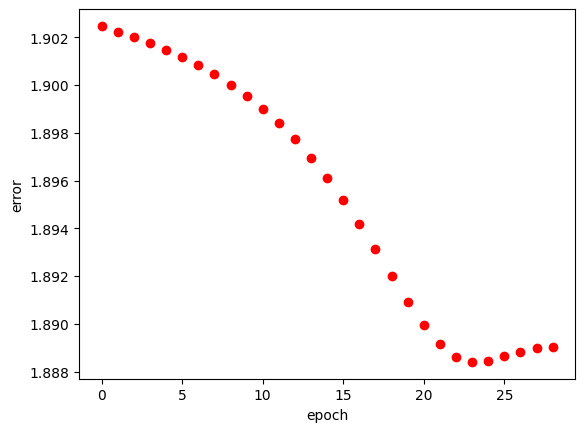

Plotting predicted value


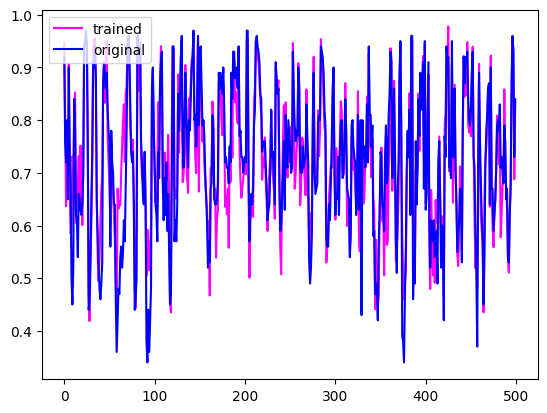

In [ ]:
mf = [[['gaussmf',{'mean':0.,'sigma':1.}],['gaussmf',{'mean':-1.,'sigma':2.}],['gaussmf',{'mean':-4.,'sigma':10.}],['gaussmf',{'mean':-7.,'sigma':7.}]],
            [['gaussmf',{'mean':1.,'sigma':2.}],['gaussmf',{'mean':2.,'sigma':3.}],['gaussmf',{'mean':-2.,'sigma':10.}],['gaussmf',{'mean':-10.5,'sigma':5.}]]]

print("Note: Error printed is Residual Sum of Squares")

mfc = MemFuncs(mf)
anf = ANFIS(X, Y, mfc)
anf.trainHybridJangOffLine(epochs=30)

print("Plotting errors")
anf.plotErrors()
print("Plotting predicted value")
anf.plotResults()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

preds = predict(anf, X)

print("Coefficient of Determination ==")
print(r2_score(Y, preds))
print("MAE ==")
print(mean_absolute_error(Y, preds))

Coefficient of Determination ==
0.8095181769878086
MAE ==
0.043421992257024596


# Perbandingan dengan Multivariate Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
cod = r2_score(Y, Y_pred)
print('COD Linear Regression:', cod)

COD Linear Regression: 0.7995882998588075


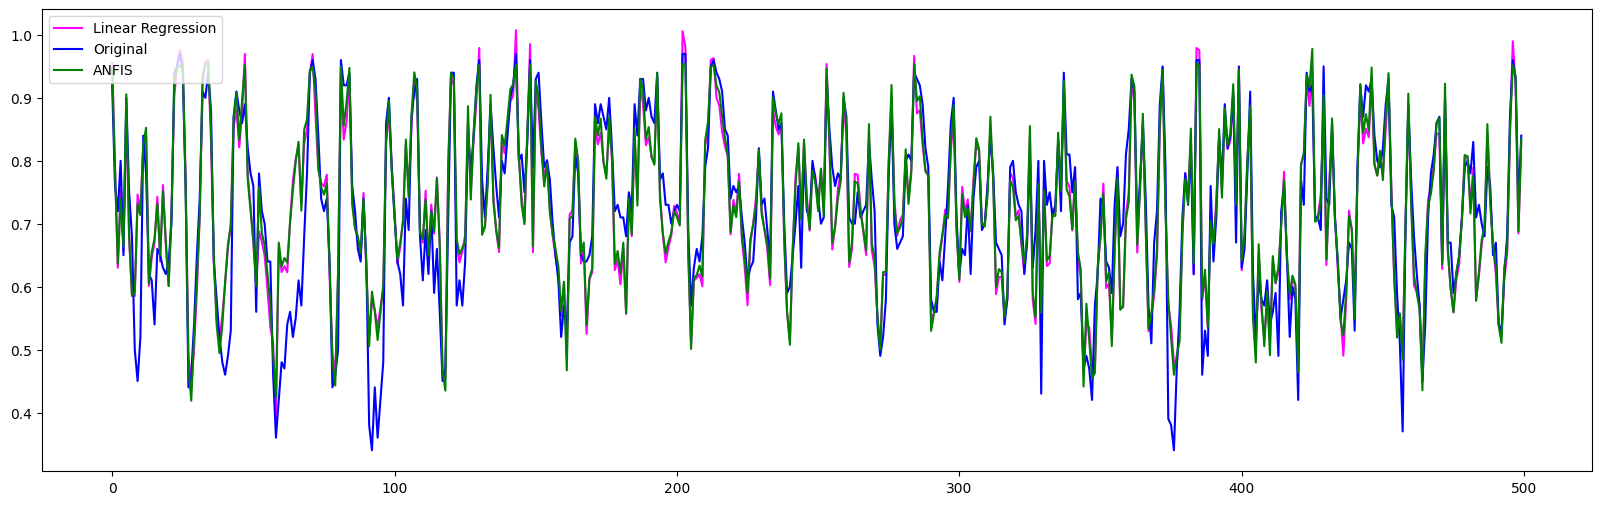

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(range(len(Y_pred)),Y_pred,'magenta', label='Linear Regression')
plt.plot(range(len(Y)),Y,'blue', label='Original')
plt.plot(range(len(preds)),preds,'green', label='ANFIS')
plt.legend(loc='upper left')
plt.show()